# Lecture 2: Basic Learning Theory

In [1]:
import random
import matplotlib.pyplot as plt
from numpy.random import normal

## Data Generation Process

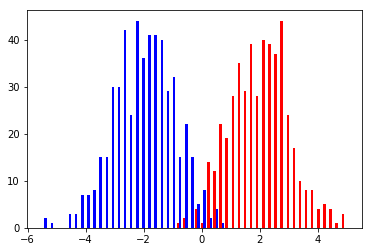

In [14]:
N = 1000 # sample size
comp_idx = [1,2]
x_pos, x_neg = [], [] # observations

# There is a more efficient way than the for loop
for i in range(N):
    idx = random.sample(comp_idx,1)[0]
    if idx == 1:
        x_pos.append(normal(2,1))
    elif idx == 2:
        x_neg.append(normal(-2,1))
    else:
        raise ValueError("Unrecognized idx = {}".format(idx))
    
# print(x_pos)
# print(x_neg)

plt.hist([x_pos,x_neg], bins=50, color=['r','b'])
plt.savefig("data-gen.png")

## Finite Hypothesis Space

In [ ]:
m = 8
b = 0.2
x = [random.uniform(0,1) for i in range(m)]
y = [1 if (item>b) else -1 for item in x]

plt.plot(x,y,"o", markersize=1)
plt.xlim(-0.05,1.05)
plt.ylim(-2,2)
plt.yticks([-1,1], fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel("$\mathcal{X}$", fontsize=18)
plt.ylabel("$\mathcal{Y}$", fontsize=18)
plt.savefig("dist-691.png")

## Unrealizable Case

In [3]:
from numpy.random import beta as beta_sample
from numpy import linspace
from scipy.stats import beta
import operator

### Create Data

In [4]:
# Number of examples per label
m = 1000

# Draw examples and assign labels
x1 = list(beta_sample(4,1,m))
y1 = [1]*m
# print(sorted(x1))
x2 = list(beta_sample(1,4,m))
y2 = [-1]*m
# print(sorted(x2))

# Combine positive and negative examples
x = x1 + x2
y = y1 + y2

# Plot the examples
# plt.plot(x,y,"o", markersize=5)
# plt.xlim(-0.05,1.05)
# plt.ylim(-2,2)
# plt.yticks([-1,1], fontsize=16)
# plt.xticks(fontsize=16)
# plt.xlabel("$\mathcal{X}$", fontsize=18)
# plt.ylabel("$\mathcal{Y}$", fontsize=18)
# plt.savefig("beta-10.png")

### Visualize Data Distribution

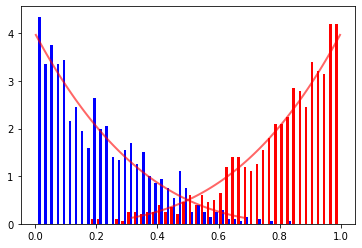

In [5]:
# Plot the examples
plt.hist([x1,x2], bins=50, color=['r','b'], density=True)

# PDF plot of Beta(x;4,1)
ls1 = linspace(beta.ppf(0.01, 4, 1),beta.ppf(0.99, 4, 1), 100)
plt.plot(ls1, beta.pdf(ls1, 4, 1), 'r-', lw=2, alpha=0.6)

# PDF plot of Beta(x;1,4)
ls2 = linspace(beta.ppf(0.01, 1, 4),beta.ppf(0.99, 1, 4), 100)
plt.plot(ls2, beta.pdf(ls2, 1, 4), 'r-', lw=2, alpha=0.6)

# Save to file
plt.savefig("beta-unrealistic.png")

### Compute Empirical Risk

In [6]:


def compute_empirical_risk(x, y, b=0.5):
    error_counts = 0.0

    for (idx,val) in enumerate(x):
        if (val <= b) and (y[idx] > 0):
            error_counts += 1
        elif (val > b) and (y[idx] < 0):
            error_counts += 1
            
    return error_counts/len(x)

def find_thresh(x, y):
    res = {}
    sorted_x = sorted(x)
    for idx in range(len(x)-1):
        if idx % 100 == 0:
            print(idx)
        b = (x[idx] + x[idx+1])/2
        r = compute_empirical_risk(x, y, b)
        res[b] = r
    sorted_res = sorted(res.items(), key=operator.itemgetter(1))
    print(sorted_res[0])
    return sorted_res[0]

In [7]:
# Compute the emprical risk

b, er = find_thresh(x, y)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
(0.4996525490801703, 0.0535)


In [11]:
# Compute the risk of the Bayes predictor

tr_pos = 0.5*beta.cdf(0.5,4,1) # Give the prob P(X<0.5)
print(tr_pos)

tr_neg = 0.5*(1 - beta.cdf(0.5,1,4)) # Give the prob P(X>0.5)
print(tr_neg)

true_risk = tr_pos + tr_neg
print("L_D(h^*) = {}".format(true_risk))

0.03125
0.03125
L_D(h^*) = 0.0625


In [12]:
# Compute L_D(h_S)

l_d_pos = 0.5*beta.cdf(b,4,1) # Give the prob P(X<0.5)
print(l_d_pos)

l_d_neg = 0.5*(1 - beta.cdf(b,1,4)) # Give the prob P(X>0.5)
print(l_d_neg)

L_d_risk = l_d_pos + l_d_neg
print("L_D(h_S) = {}".format(L_d_risk))

0.031163227769711116
0.03133695331351599
L_D(h_S) = 0.06250018108322711
